# MNIST Digit Recognition
final goal of project is to classify any single handwritten digit form jpeg file

### loading dataset and  data loader

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the transformations to apply to the data
transform = transforms.Compose([
    transforms.ToTensor() 
])

# Download and load the training data
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
# Download and load the test data
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# creating  data loaders to handle dataset
bs = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=bs, shuffle=True, num_workers=2)
test_loader = DataLoader(dataset=test_dataset, batch_size=bs, shuffle=False, num_workers=2)


d:\Apps\Anaconda\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


### Drawing a sample from dataset

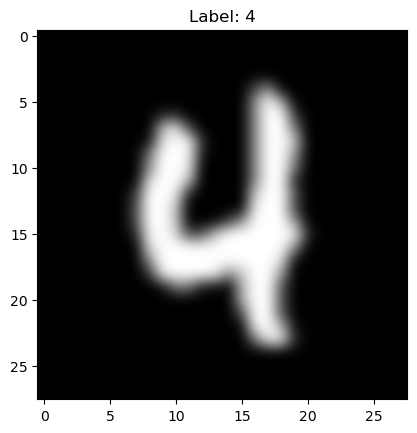

In [2]:
sample,label =train_dataset[np.random.randint(len(train_dataset))]
sample = sample.permute(1,2,0)
plt.imshow(sample,cmap='gray',interpolation='bicubic')
plt.title(f"Label: {label}")
plt.show()


### Defining Model class

In [3]:
import torch.nn.functional as F
class MNIST_classifier (nn.Module):
    def __init__(self):
        super(MNIST_classifier, self).__init__()
        input_layer = 784
        hidden_layer1 = 64
        hidden_layer2 = 64
        output_layer = 10
        self.linear1 = nn.Linear(input_layer, hidden_layer1)
        self.activation1 = nn.ReLU()
        self.linear2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.activation2 = nn.ReLU()
        self.linear3 = nn.Linear(hidden_layer2, output_layer)

    def forward (self, x):
        x = self.linear1(x)
        x = self.activation1(x)
        x = self.linear2(x)
        x = self.activation2(x)
        x = self.linear3(x)
        return x
    
    def inference (self, x):
        x = self.forward(x)
        x = F.softmax(x, dim=1)
        return x
    

### Training loop

In [5]:
model = MNIST_classifier()
num_epochs = 10
lr = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=lr ,momentum=0.9)
criterion = nn.CrossEntropyLoss()

for epoch in range (num_epochs):
    model.train()
    running_loss = 0
    for idx, (images,labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28)
        predictions = model(images)
        loss = criterion(predictions,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss
        optimizer.zero_grad()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')



Epoch [1/10], Loss: 0.5420
Epoch [2/10], Loss: 0.2039
Epoch [3/10], Loss: 0.1481
Epoch [4/10], Loss: 0.1149
Epoch [5/10], Loss: 0.0954
Epoch [6/10], Loss: 0.0811
Epoch [7/10], Loss: 0.0716
Epoch [8/10], Loss: 0.0618
Epoch [9/10], Loss: 0.0550
Epoch [10/10], Loss: 0.0490


### Evaluation model performance

In [10]:
model.eval()

correct = 0 
total = 0
with torch.no_grad():
    for idx , (images,labels) in enumerate(test_loader):
        images = images.reshape(-1, 28*28)
        predictions = model(images)
        _ , predicted = torch.max(predictions,1)
        #correct += (predicted==labels).sum().item()
        correct += torch.sum(predicted == labels).item()

        total += len(labels)
        
accuracy = correct/ total 

In [11]:
print (f"accuracy :{accuracy}")

accuracy :0.974


### Testing Model predictions on sample data 

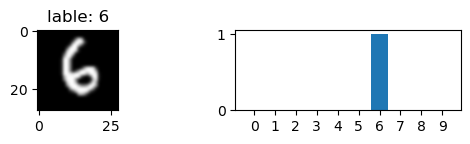

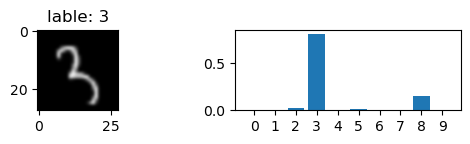

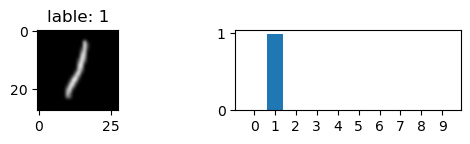

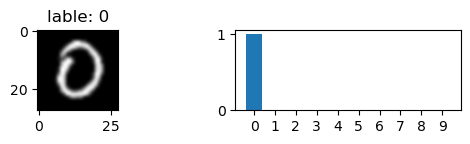

In [62]:
model.eval()
with torch.no_grad():
    num_samples = 4
    for i in range (num_samples):
        sample,label = test_dataset[np.random.randint(0,len(test_dataset))]
        vectorized_sample = sample.reshape(1,28*28)
        pred = model.inference(vectorized_sample)
        plt.subplot(4,2,i*2+1)
        plt.imshow(sample.reshape(28,28),cmap='gray',interpolation='bicubic')
        plt.title(f'lable: {label}')
        plt.subplot(num_samples,2,i*2+2)
        plt.bar(np.arange(10),pred[0].numpy())
        plt.xticks(np.arange(10))
        plt.show()


### Saving Model